In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Read the Excel file
df = pd.read_excel('Online retail.xlsx', sheet_name='Sheet1', header=None)


df.head()




,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
transactions = df[0].str.split(',').tolist()

# Use TransactionEncoder to transform the list of transactions into a one-hot encoded DataFrame
encoder = TransactionEncoder()
encoded_array = encoder.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(encoded_array, columns=encoder.columns_)

# Display the first few rows of the encoded DataFrame
encoded_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [4]:
min_support = 0.01  # Adjust this value as needed
frequent_itemsets = apriori(encoded_df, min_support=min_support, use_colnames=True)

frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)


In [5]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.02)

# Sort rules by lift in descending order
rules = rules.sort_values('lift', ascending=False)

rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
239,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460
238,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,0.772094
413,(ground beef),"(spaghetti, mineral water)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602
408,"(spaghetti, mineral water)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,0.697788
425,(olive oil),"(spaghetti, mineral water)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,0.660314
420,"(spaghetti, mineral water)",(olive oil),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021,0.656007
214,(tomatoes),(frozen vegetables),0.068391,0.095321,0.016131,0.235867,2.474464,0.009612,1.183930,0.639616
215,(frozen vegetables),(tomatoes),0.095321,0.068391,0.016131,0.169231,2.474464,0.009612,1.121381,0.658656
210,(shrimp),(frozen vegetables),0.071457,0.095321,0.016664,0.233209,2.446574,0.009853,1.179825,0.636767
211,(frozen vegetables),(shrimp),0.095321,0.071457,0.016664,0.174825,2.446574,0.009853,1.125268,0.653563


###  visualizations

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


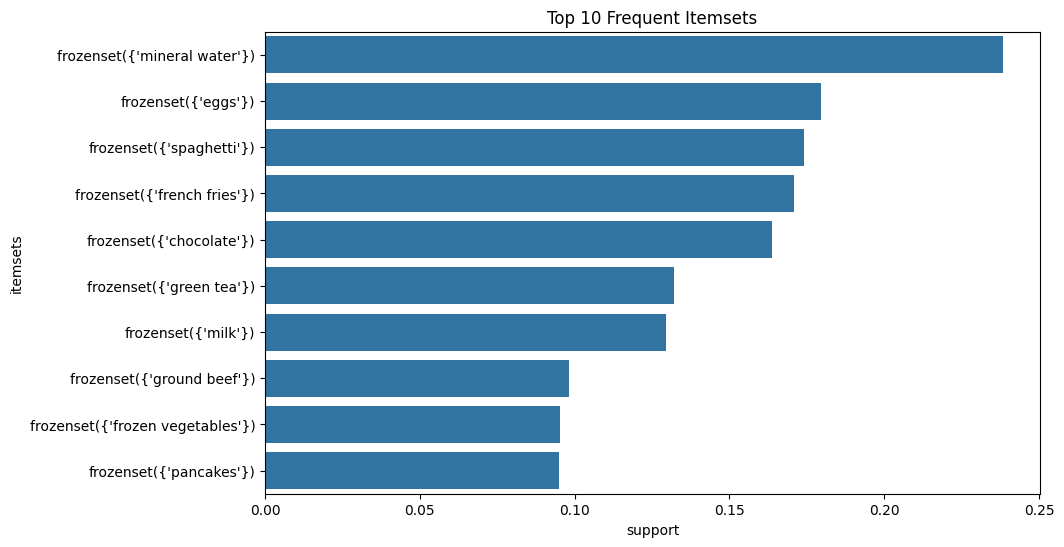

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

top_itemsets = frequent_itemsets.nlargest(10, 'support')
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=top_itemsets)
plt.title('Top 10 Frequent Itemsets')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


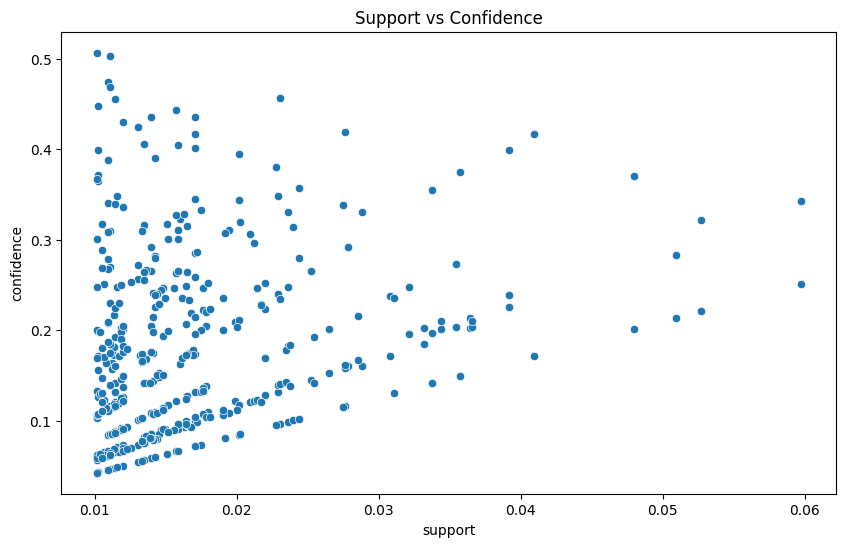

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', data=rules)
plt.title('Support vs Confidence')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


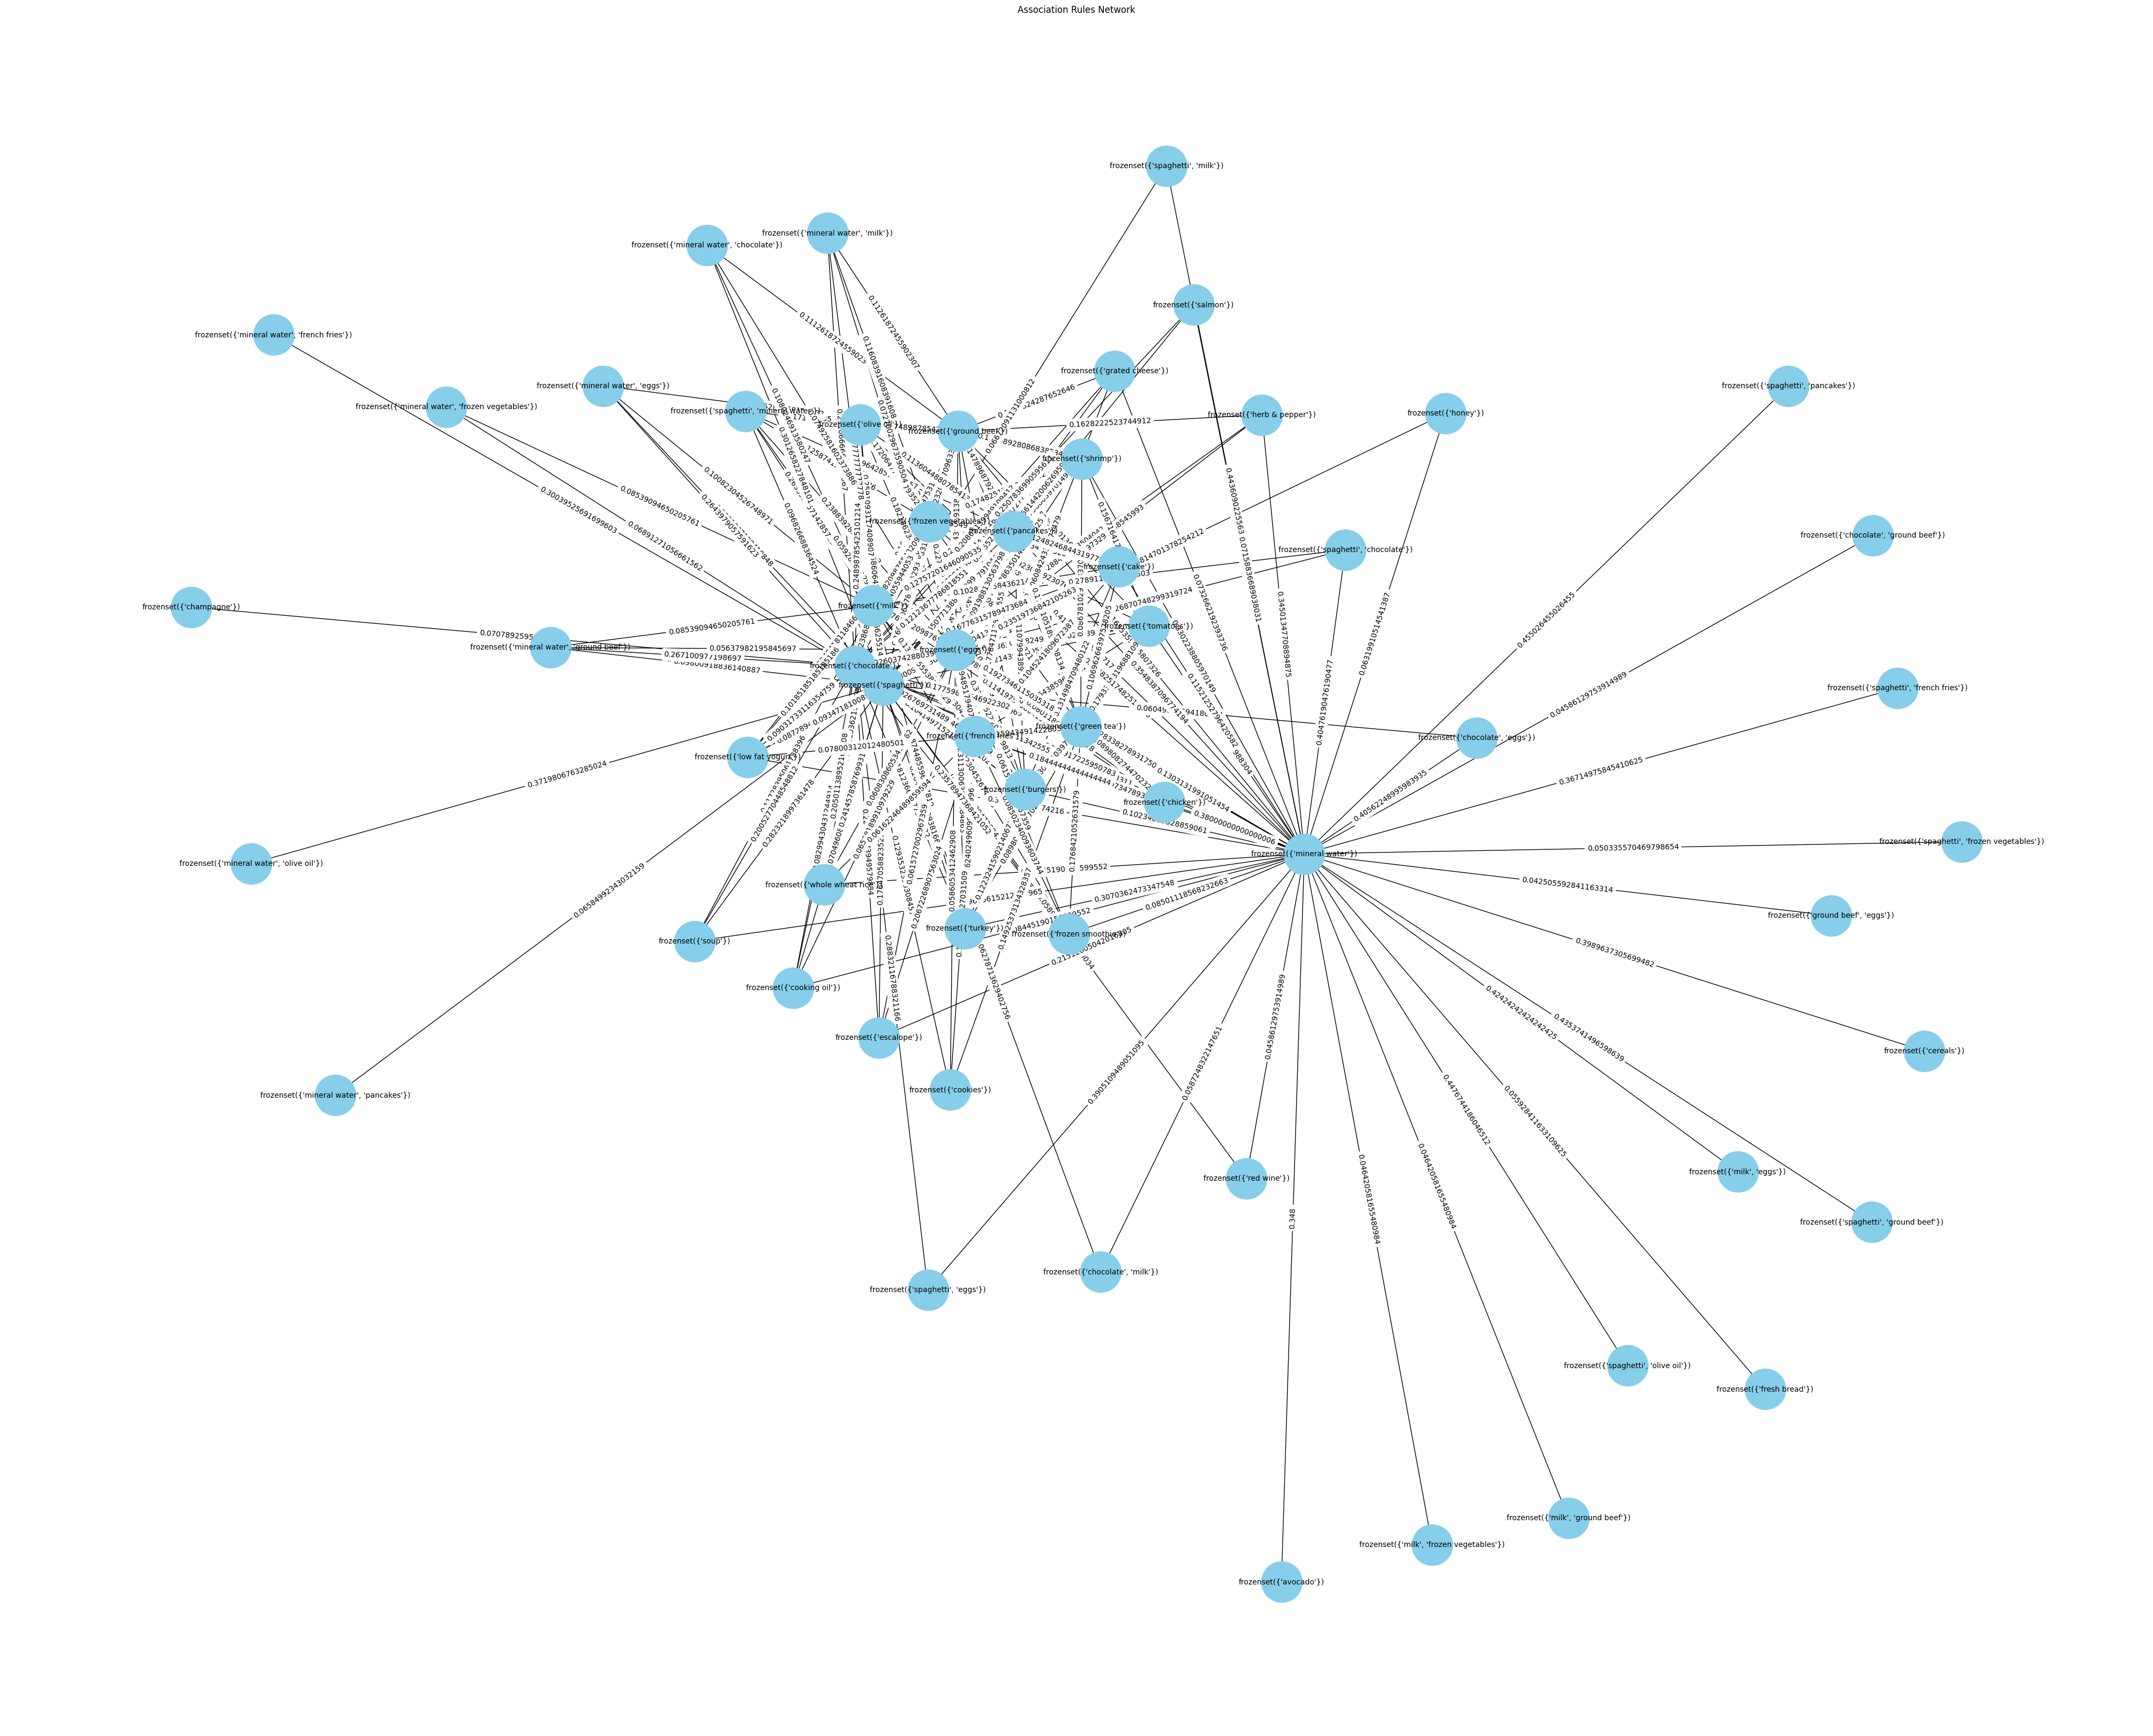

In [13]:
import networkx as nx

G = nx.from_pandas_edgelist(rules, 'antecedents', 'consequents', ['confidence'])
plt.figure(figsize=(40, 32))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'confidence')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Association Rules Network')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


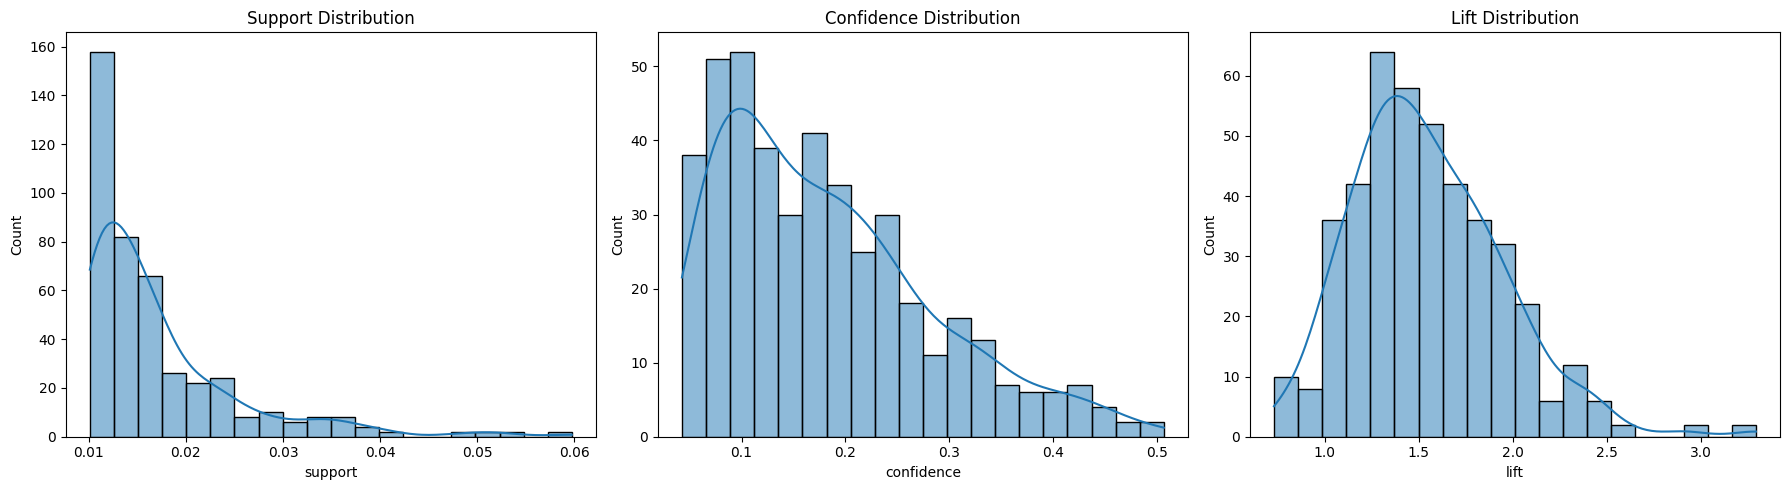

In [18]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(rules['support'], bins=20, kde=True)
plt.title('Support Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rules['confidence'], bins=20, kde=True)
plt.title('Confidence Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rules['lift'], bins=20, kde=True)
plt.title('Lift Distribution')

plt.tight_layout()
plt.show()



---



---



###  Interview Questions:

1.	What is lift and why is it important in Association rules?

Lift is a measure of the strength of the association between two items, taking into account the frequency of both items in the dataset. It is calculated as the confidence of the association divided by the support of the second item.



---

2.	What is support and Confidence. How do you calculate them?

Support is the number of transactions containing an itemset divided by the total number of transactions. A value of 1 indicates the itemset appears in every transaction, while 0 means it doesn't appear in any.

"support(A)=no.of transection contain (A)/Total no.of transection"


---



Confidence is the number of transactions containing both itemsets divided by the number of transactions containing the first itemset. It measures the likelihood of product Y being sold with product X, represented as X=>Y.

Confidence(A=>B)=support(A U B)/support(A) X support(B)





---
3.	What are some limitations or challenges of Association rules mining?


1. **High Computational Complexity**: Generating rules can be computationally intensive, especially with large datasets.
2. **Threshold Setting**: Choosing appropriate minimum support and confidence levels is crucial and tricky.
3. **Sparse Data Handling**: Rare but meaningful itemsets can be difficult to detect.
4. **Redundancy**: Many discovered rules may be redundant or trivial.
5. **Interpretability**: Some rules are complex and hard to understand.
6. **Association vs. Causation**: Rules indicate correlation, not causation.
7. **Continuous Data**: Requires discretization, which can lose information.
8. **Dynamic Data**: Frequent data changes require continuous updating.
9. **Evaluation**: Assessing rule significance and usefulness is challenging.
10. **Privacy Concerns**: Mining can inadvertently reveal sensitive information.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
